## Importing necessary libraries

In [1]:
import nltk
nltk.download('punkt')
nltk.download('vader_lexicon')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from transformers import pipeline
import sklearn
import vaderSentiment
import re

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\su1qt\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\su1qt\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
import os
# Define the paths
scripts_raw_path = r'C:\Users\su1qt\Significant Projects\Honors Research\data\scripts_raw'  # Adjusted path
dialogues_path = r'C:\Users\su1qt\Significant Projects\Honors Research\data\dialogues\Coco'      # Output directory
output_viz_path = r'C:\Users\su1qt\Significant Projects\Honors Research\outputs\Coco'

# Ensure the output directory exists
if not os.path.exists(dialogues_path):
    os.makedirs(dialogues_path)

# Define the path to the aladdin script
script_filename = 'coco_script.txt'
script_path = os.path.join(scripts_raw_path, script_filename)

# Verify that the script file exists
if not os.path.isfile(script_path):
    print(f"Error: The file {script_path} does not exist.")
else:
    print(f"Processing script: {script_path}")

Processing script: C:\Users\su1qt\Significant Projects\Honors Research\data\scripts_raw\coco_script.txt


## Annotate Scripts with Meta Data

In [3]:
import os
import pandas as pd

# Load the dialogues DataFrame
dialogues_df = pd.read_csv(os.path.join(dialogues_path, 'coco_dialogues.csv'))

# Character mapping for normalization
CHARACTER_MAPPING = {
    "Miguel": "Miguel",
    "Mam  Coco": "Mama Coco",
    "Abuelita": "Abuelita",
    "Musicians": "Musicians",
    "Mam": "Mama",
    "Woman": "Woman",
    "Street Vendor": "Vendor",
    "Tour Guide": "Tour Guide",
    "De La Cruz": "Ernesto De La Cruz",
    "Plaza Mariachi": "Mariachi",
    "Pap": "Papa",
    "T O Berto": "Tio Berto",
    "Pap  Julio": "Papa Julio",
    "T A Rosita": "Tia Rosita",
    "T A Victoria": "Tia Victoria",
    "T O Felipe": "Tio Felipe",
    "T O Oscar": "Tio Oscar",
    "Chicharr N": "Chicarron",
    "H Ctor": "Hector",
    "Mam  Imelda": "Mama Imelda",
    "Case Worker": "Case Worker",
    "Corrections Officer": "Corrections Officer",
    "Juan Ortodoncia": "Juan Ortodoncia",
    # Add additional mappings as needed
}

# Apply character name corrections
dialogues_df['Character'] = dialogues_df['Character'].apply(lambda x: CHARACTER_MAPPING.get(x, x))

# Get a list of unique characters after normalization
unique_characters = dialogues_df['Character'].unique()

print("List of normalized unique characters:")
for character in unique_characters:
    print(character)




List of normalized unique characters:
Miguel
Mama Coco
Abuelita
Musicians
Mama
Woman
Vendor
Tour Guide
Ernesto De La Cruz
Remember Me
Until You'Re In My Arms Again
Mariachi
Tio Berto
Papa
Pap  Franco
Prima Rosa
Primo Abel
Want Something So Much
Nun
Only A Song
Lola
Interviewer
T A Gloria
Stage Manager
Voices
Groundskeeper
Skeleton Head
Skeleton Abuela
Papa Julio
Tia Rosita
Tia Victoria
Tio Felipe
Tio Oscar
Skeleton Mother
Canned Loop
Departures Agent
Elderly Couple
Juan Ortodoncia
Hector
Arrivals Agent
Distressed Traveler
Miffed Wife
Mama Imelda
Case Worker
Clerk
Patrolwoman
Patrolman
Corrections Officer
Cecilia
Frida
Gustavo
T A Chelo
Old Tias
Chicarron
Emcee
Skeleton Musician
Opera Singers
Stagehand
On Stage
Crowd
Backstage
Audience Member
You Tell Me That It'S Red
You Say Put Them On Your Head
You Make Me Un Poco Loco
The Way You Keep Me Guessing
I'Ll Count It As A Blessing
Edge Of Audience
You Are Just Un Poco Loco            You Are Just Un Poco Loco
Hector                        

### Character metadata dictionary

In [4]:
# Character MetaData Dictionary
character_metadata = {
    'Miguel': {
        'Gender': 'Male',
        'Race/Ethnicity': 'Latino',
        'Culture': 'Mexican',
        'Role': 'Protagonist',
        'Marginalized': False,  # Supported by his family despite challenges
        'POC': True
    },
    'Mama Coco': {
        'Gender': 'Female',
        'Race/Ethnicity': 'Latino',
        'Culture': 'Mexican',
        'Role': 'Supporting',
        'Marginalized': False,  # Loved and respected within her family
        'POC': True
    },
    'Abuelita': {
        'Gender': 'Female',
        'Race/Ethnicity': 'Latino',
        'Culture': 'Mexican',
        'Role': 'Supporting',
        'Marginalized': False,  # Holds significant authority within the family
        'POC': True
    },
    'Ernesto De La Cruz': {
        'Gender': 'Male',
        'Race/Ethnicity': 'Latino',
        'Culture': 'Mexican',
        'Role': 'Antagonist',
        'Marginalized': False,  # Famous and celebrated
        'POC': True
    },
    'Mama Imelda': {
        'Gender': 'Female',
        'Race/Ethnicity': 'Latino',
        'Culture': 'Mexican',
        'Role': 'Supporting',
        'Marginalized': False,  # Holds leadership within the family in the afterlife
        'POC': True
    },
    'Hector': {
        'Gender': 'Male',
        'Race/Ethnicity': 'Latino',
        'Culture': 'Mexican',
        'Role': 'Supporting',
        'Marginalized': True,  # Struggles to be remembered and gain respect
        'POC': True
    },
    'Chicarron': {
        'Gender': 'Male',
        'Race/Ethnicity': 'Latino',
        'Culture': 'Mexican',
        'Role': 'Supporting',
        'Marginalized': True,  # Forgotten in the afterlife
        'POC': True
    },
    'Tia Rosita': {
        'Gender': 'Female',
        'Race/Ethnicity': 'Latino',
        'Culture': 'Mexican',
        'Role': 'Supporting',
        'Marginalized': False,  # Respected within the family
        'POC': True
    },
    'Papa Julio': {
        'Gender': 'Male',
        'Race/Ethnicity': 'Latino',
        'Culture': 'Mexican',
        'Role': 'Supporting',
        'Marginalized': False,  # Respected within the family
        'POC': True
    },
    'Tio Berto': {
        'Gender': 'Male',
        'Race/Ethnicity': 'Latino',
        'Culture': 'Mexican',
        'Role': 'Supporting',
        'Marginalized': False,  # Respected within the family
        'POC': True
    },
    'Tio Oscar & Tio Felipe': {
        'Gender': 'Male',
        'Race/Ethnicity': 'Latino',
        'Culture': 'Mexican',
        'Role': 'Supporting',
        'Marginalized': False,  # Respected within the family
        'POC': True
    },
    'Mariachi': {
        'Gender': 'Male',
        'Race/Ethnicity': 'Latino',
        'Culture': 'Mexican',
        'Role': 'Supporting',
        'Marginalized': True,  # Lower social status as a street musician
        'POC': True
    },
    'Arrival Agent': {
        'Gender': 'Male',
        'Race/Ethnicity': 'Latino',
        'Culture': 'Mexican',
        'Role': 'Supporting',
        'Marginalized': False,  # Holds a functional role in the afterlife
        'POC': True
    },
    'Corrections Officer': {
        'Gender': 'Male',
        'Race/Ethnicity': 'Latino',
        'Culture': 'Mexican',
        'Role': 'Supporting',
        'Marginalized': False,  # Holds a position of authority
        'POC': True
    },
    'Juan Ortodoncia': {
        'Gender': 'Male',
        'Race/Ethnicity': 'Latino',
        'Culture': 'Mexican',
        'Role': 'Supporting',
        'Marginalized': False,  # Respected within the community
        'POC': True
    },
    # Add more characters as needed
}


In [5]:
# Define the characters to keep for analysis
characters_to_keep = [
    'Miguel',
    'Mama Coco',
    'Abuelita',
    'Ernesto De La Cruz',
    'Mama Imelda',
    'Hector',
    'Chicarron',
    'Tia Rosita',
    'Papa Julio',
    'Tio Berto',
    'Tio Oscar & Tio Felipe',
    'Mariachi',
    'Arrival Agent',
    'Corrections Officer',
    'Juan Ortodoncia'
    # Add more key characters as needed
]


# Filter the DataFrame to include only the characters to keep
filtered_dialogues_df = dialogues_df[dialogues_df['Character'].isin(characters_to_keep)]

# Preview the filtered DataFrame
print("\nFiltered Dialogues DataFrame:")
filtered_dialogues_df.sample(5)


Filtered Dialogues DataFrame:


,Character,Dialogue
565,Miguel,"(singing) WHAT COLOR IS THE SKY? AY MI AMOR, A..."
878,Hector,Imelda-- De la Cruz drags Miguel away as his f...
255,Papa Julio,"Miguel follows after the family, the petals gl..."
737,Hector,"no, NO! alone with de la Cruz."
816,Miguel,107. Crowds are congregated at de la Cruz's Su...


In [6]:
# Convert the metadata dictionary to a DataFrame
metadata_df = pd.DataFrame.from_dict(character_metadata, orient='index')

# Reset the index to make 'Character' a column
metadata_df.reset_index(inplace=True)
metadata_df.rename(columns={'index': 'Character'}, inplace=True)

# Preview the metadata DataFrame
print("Metadata DataFrame:")
metadata_df.head()

annotated_dialogues_df = pd.merge(filtered_dialogues_df, metadata_df, on='Character', how='left')

Metadata DataFrame:


In [7]:
# Find characters with missing metadata
missing_metadata = annotated_dialogues_df[annotated_dialogues_df['Gender'].isnull()]['Character'].unique()

if len(missing_metadata) > 0:
    print("Characters missing metadata:")
    for character in missing_metadata:
        print(character)
else:
    print("All characters have metadata.")

All characters have metadata.


In [8]:
annotated_dialogues_df.sample(5)
annotated_dialogues_df.columns


Index(['Character', 'Dialogue', 'Gender', 'Race/Ethnicity', 'Culture', 'Role',
       'Marginalized', 'POC'],
      dtype='object')

In [9]:
# Rearrange columns for clarity
columns_order = [
    'Character', 'Gender', 'Race/Ethnicity', 'Culture',
    'Role', 'Marginalized', 'POC', 'Dialogue'
]
annotated_dialogues_df = annotated_dialogues_df[columns_order]

# Preview the annotated dialogues DataFrame
print("Annotated Dialogues DataFrame:")
annotated_dialogues_df.sample(10)

Annotated Dialogues DataFrame:


,Character,Gender,Race/Ethnicity,Culture,Role,Marginalized,POC,Dialogue
60,Mariachi,Male,Latino,Mexican,Supporting,True,True,Did de la Cruz become the world's best musicia...
599,Miguel,Male,Latino,Mexican,Protagonist,False,True,Dante?
107,Miguel,Male,Latino,Mexican,Protagonist,False,True,I--
375,Chicarron,Male,Latino,Mexican,Supporting,True,True,"then he weakens and collapses in his hammock, ..."
356,Miguel,Male,Latino,Mexican,Protagonist,False,True,Whadda you know? As Miguel descends the stairc...
26,Miguel,Male,Latino,Mexican,Protagonist,False,True,S-s ?
433,Miguel,Male,Latino,Mexican,Protagonist,False,True,(singing)
741,Miguel,Male,Latino,Mexican,Protagonist,False,True,just old pictures -- they're our family -- and...
647,Ernesto De La Cruz,Male,Latino,Mexican,Antagonist,False,True,Grandson? Now Miguel leaps out of the corridor.
321,Hector,Male,Latino,Mexican,Supporting,True,True,"Ceci, I lost the dress--"


In [10]:
output_file = os.path.join(dialogues_path, 'coco_annotated_dialogues.csv')
annotated_dialogues_df.to_csv(output_file, index=False)

Preprocessing the text data

In [11]:
dialogues_path = r'C:\Users\su1qt\Significant Projects\Honors Research\data\dialogues\Coco'
annotated_dialogues_file = os.path.join(dialogues_path, 'coco_annotated_dialogues.csv')

# Check if the file exists
if not os.path.isfile(annotated_dialogues_file):
    raise FileNotFoundError(f"The file {annotated_dialogues_file} does not exist. Please check the path.")

# Load the annotated dialogues DataFrame
annotated_dialogues_df = pd.read_csv(annotated_dialogues_file)

# Display the first few rows
annotated_dialogues_df.sample(5)

,Character,Gender,Race/Ethnicity,Culture,Role,Marginalized,POC,Dialogue
135,Abuelita,Female,Latino,Mexican,Supporting,False,True,Miguel backs out of the courtyard and into the...
84,Abuelita,Female,Latino,Mexican,Supporting,False,True,"follow you forever. (beat) Now, go get my shoe..."
301,Hector,Male,Latino,Mexican,Supporting,True,True,gotta have SOME other family.
677,Hector,Male,Latino,Mexican,Supporting,True,True,You're going home.
721,Miguel,Male,Latino,Mexican,Protagonist,False,True,"Please -- if you forget him, he'll"


## Cleaning the dialogue text

In [12]:
def clean_dialogue(text):
    """
    Clean the dialogue text by removing stage directions, special characters, and extra whitespace.
    
    Parameters:
        text (str): The original dialogue text.
    
    Returns:
        str: The cleaned dialogue text.
    """
    # Remove stage directions enclosed in brackets []
    text = re.sub(r'\[.*?\]', '', text)
    
    # Remove parentheses and their content (e.g., (laughs))
    text = re.sub(r'\(.*?\)', '', text)
    
    # Optionally, remove other non-dialogue annotations
    # text = re.sub(r'<.*?>', '', text)
    
    # Remove extra whitespace
    text = text.strip()
    
    return text

# Apply the cleaning function to the 'Dialogue' column
annotated_dialogues_df['Cleaned Dialogue'] = annotated_dialogues_df['Dialogue'].apply(clean_dialogue)

# Display the first few cleaned dialogues
annotated_dialogues_df[['Dialogue', 'Cleaned Dialogue']].sample(5)

,Dialogue,Cleaned Dialogue
676,family loves you.,family loves you.
72,"Do a, please -- I was just getting a shine!","Do a, please -- I was just getting a shine!"
254,You really hate music that much?,You really hate music that much?
602,(icy) H ctor.,H ctor.
228,"It was my great-great grandfather's, he would ...","It was my great-great grandfather's, he would ..."


In [13]:
## removing NaN for dialogues
annotated_dialogues_df = annotated_dialogues_df[annotated_dialogues_df['Cleaned Dialogue'].notna() & (annotated_dialogues_df['Cleaned Dialogue'].str.strip() != '')]

In [14]:
(annotated_dialogues_df.isna() == True).count()

Character           736
Gender              736
Race/Ethnicity      736
Culture             736
Role                736
Marginalized        736
POC                 736
Dialogue            736
Cleaned Dialogue    736
dtype: int64

## Expnading Contractions

In [15]:
import contractions

def expand_contractions_func(text):
    """
    Expand contractions in the text to their full forms.
    
    Parameters:
        text (str): The cleaned dialogue text.
    
    Returns:
        str: The dialogue text with expanded contractions.
    """
    return contractions.fix(text)

# Apply the contraction expansion function
annotated_dialogues_df['Cleaned Dialogue'] = annotated_dialogues_df['Cleaned Dialogue'].apply(expand_contractions_func)

# Display the first few dialogues after expanding contractions
annotated_dialogues_df[['Dialogue', 'Cleaned Dialogue']].sample(5)

,Dialogue,Cleaned Dialogue
29,No music! Miguel listens as a truck drives by ...,No music! Miguel listens as a truck drives by ...
387,Where did he go?,Where did he go?
530,"Oh, how generous.","Oh, how generous."
119,Miguel tunes the guitar.,Miguel tunes the guitar.
710,H ctor--,H ctor--


In [16]:
# Define the path to save the preprocessed dialogues
preprocessed_file = os.path.join(dialogues_path, 'coco_preprocessed_dialogues.csv')

# Save the preprocessed DataFrame
annotated_dialogues_df.to_csv(preprocessed_file, index=False)

print(f"\nPreprocessed dialogues saved to {preprocessed_file}")


Preprocessed dialogues saved to C:\Users\su1qt\Significant Projects\Honors Research\data\dialogues\Coco\coco_preprocessed_dialogues.csv


## Sentiment Analaysis using VADer

In [18]:
# Define the path to the preprocessed dialogues CSV
dialogues_path = r'C:\Users\su1qt\Significant Projects\Honors Research\data\dialogues\Coco'
preprocessed_dialogues_file = os.path.join(dialogues_path, 'coco_preprocessed_dialogues.csv')

# Check if the file exists
if not os.path.isfile(preprocessed_dialogues_file):
    raise FileNotFoundError(f"The file {preprocessed_dialogues_file} does not exist. Please check the path.")

# Load the preprocessed dialogues DataFrame
preprocessed_dialogues_df = pd.read_csv(preprocessed_dialogues_file)

# Display the first few rows

preprocessed_dialogues_df.sample(5)

,Character,Gender,Race/Ethnicity,Culture,Role,Marginalized,POC,Dialogue,Cleaned Dialogue
614,Hector,Male,Latino,Mexican,Supporting,True,True,"This is my fault, not yours. (beat) I'm sorry,...","This is my fault, not yours. I am sorry, Imel..."
522,Ernesto De La Cruz,Male,Latino,Mexican,Antagonist,False,True,We made a great team but -- you died and I -- ...,We made a great team but -- you died and I -- ...
633,Ernesto De La Cruz,Male,Latino,Mexican,Antagonist,False,True,(disoriented) Who the? H ctor leaps out from a...,Who the? H ctor leaps out from around the corner.
389,Hector,Male,Latino,Mexican,Supporting,True,True,How do you think I knew your great- everything...,How do you think I knew your great- everything...
43,Miguel,Male,Latino,Mexican,Protagonist,False,True,time. A tour group and their TOUR GUIDE are ga...,time. A tour group and their TOUR GUIDE are ga...


In [19]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download VADER lexicon if not already downloaded
nltk.download('vader_lexicon')

# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\su1qt\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## Calculate Sentiment Scores and Labels

In [20]:
def get_sentiment_scores(text):
    """
    Calculate sentiment scores for the given text using VADER.
    
    Parameters:
        text (str): The preprocessed dialogue text.
    
    Returns:
        dict: A dictionary containing 'neg', 'neu', 'pos', and 'compound' scores.
    """
    return sia.polarity_scores(text)

def categorize_sentiment(score):
    """
    Categorize sentiment based on the compound score.
    
    Parameters:
        score (float): The compound sentiment score.
    
    Returns:
        str: The sentiment category ('Positive 😊', 'Negative 😡', 'Neutral 😐').
    """
    if score >= 0.05:
        return 'Positive 😊'
    elif score <= -0.05:
        return 'Negative 😡'
    else:
        return 'Neutral 😐'

## Applying sentiment analysis to each dialogue

In [21]:
# Apply the sentiment scores function to the 'Cleaned Dialogue' column
preprocessed_dialogues_df['Sentiment Scores'] = preprocessed_dialogues_df['Cleaned Dialogue'].apply(get_sentiment_scores)

# Extract the compound score
preprocessed_dialogues_df['Compound Score'] = preprocessed_dialogues_df['Sentiment Scores'].apply(lambda x: x['compound'])

# Categorize sentiment based on the compound score
preprocessed_dialogues_df['Sentiment'] = preprocessed_dialogues_df['Compound Score'].apply(categorize_sentiment)

# Display the first few dialogues with sentiment scores and labels
preprocessed_dialogues_df[['Cleaned Dialogue', 'Compound Score', 'Sentiment']].sample(5)

,Cleaned Dialogue,Compound Score,Sentiment
412,Now give me your best grito!,0.6696,Positive 😊
671,115. De la Cruz drags Miguel further and furth...,-0.1779,Negative 😡
556,De la Cruz crumples the marigold petal.,0.0000,Neutral 😐
148,"His parents stop, looking up at Miguel.",-0.2960,Negative 😡
204,And I apologize for doing that.,0.1027,Positive 😊


In [22]:
# Define the path to save the sentiment-analyzed dialogues
sentiment_file = os.path.join(dialogues_path, 'coco_dialogues.csv')

# Save the DataFrame with sentiment analysis
preprocessed_dialogues_df.to_csv(sentiment_file, index=False)

print(f"\nDialogues with sentiment analysis saved to {sentiment_file}")


Dialogues with sentiment analysis saved to C:\Users\su1qt\Significant Projects\Honors Research\data\dialogues\Coco\coco_dialogues.csv


## Analyzing the Results

In [23]:
# Define the path to the sentiment-analyzed dialogues CSV
dialogues_path = r'C:\Users\su1qt\Significant Projects\Honors Research\data\dialogues\Coco'
sentiment_dialogues_file = os.path.join(dialogues_path, 'coco_dialogues.csv')

# Check if the file exists
if not os.path.isfile(sentiment_dialogues_file):
    raise FileNotFoundError(f"The file {sentiment_dialogues_file} does not exist. Please check the path.")

# Load the sentiment-analyzed dialogues DataFrame
sentiment_dialogues_df = pd.read_csv(sentiment_dialogues_file)

# Display the first few rows
sentiment_dialogues_df.sample(10)

,Character,Gender,Race/Ethnicity,Culture,Role,Marginalized,POC,Dialogue,Cleaned Dialogue,Sentiment Scores,Compound Score,Sentiment
322,Miguel,Male,Latino,Mexican,Protagonist,False,True,I just followed my-- 57. takes his head in her...,I just followed my-- 57. takes his head in her...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral 😐
460,Miguel,Male,Latino,Mexican,Protagonist,False,True,I thought you hated music.,I thought you hated music.,"{'neg': 0.583, 'neu': 0.417, 'pos': 0.0, 'comp...",-0.6369,Negative 😡
683,Miguel,Male,Latino,Mexican,Protagonist,False,True,AHHH!,AHHH!,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral 😐
656,Mama Imelda,Female,Latino,Mexican,Supporting,False,True,"AY DE M , LLORONA, LLORONA, She heads to leave...","AY DE M , LLORONA, LLORONA, She heads to leave...","{'neg': 0.099, 'neu': 0.849, 'pos': 0.052, 'co...",-0.2103,Negative 😡
5,Miguel,Male,Latino,Mexican,Protagonist,False,True,She found a way to provide for her (beat) She ...,She found a way to provide for her She rolled...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral 😐
613,Mama Imelda,Female,Latino,Mexican,Supporting,False,True,"(to H ctor) Coco to forget you too, but--","Coco to forget you too, but--","{'neg': 0.275, 'neu': 0.725, 'pos': 0.0, 'comp...",-0.2263,Negative 😡
90,Miguel,Male,Latino,Mexican,Protagonist,False,True,"Mam looks at Miguel, curious.","Mam looks at Miguel, curious.","{'neg': 0.0, 'neu': 0.635, 'pos': 0.365, 'comp...",0.3182,Positive 😊
125,Ernesto De La Cruz,Male,Latino,Mexican,Antagonist,False,True,Never underestimate the power of Miguel's tune...,Never underestimate the power of Miguel's tune...,"{'neg': 0.0, 'neu': 0.905, 'pos': 0.095, 'comp...",0.2235,Positive 😊
22,Miguel,Male,Latino,Mexican,Protagonist,False,True,daughter. Abuelita piles extra tamales on Migu...,daughter. Abuelita piles extra tamales on Migu...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral 😐
263,Corrections Officer,Male,Latino,Mexican,Supporting,False,True,Uh--,Uh--,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral 😐


In [24]:
sentiment_dialogues_df.columns

Index(['Character', 'Gender', 'Race/Ethnicity', 'Culture', 'Role',
       'Marginalized', 'POC', 'Dialogue', 'Cleaned Dialogue',
       'Sentiment Scores', 'Compound Score', 'Sentiment'],
      dtype='object')


Summary Statistics of Compound Sentiment Scores:
count    736.000000
mean       0.022896
std        0.346996
min       -0.941000
25%       -0.025800
50%        0.000000
75%        0.194675
max        0.938100
Name: Compound Score, dtype: float64


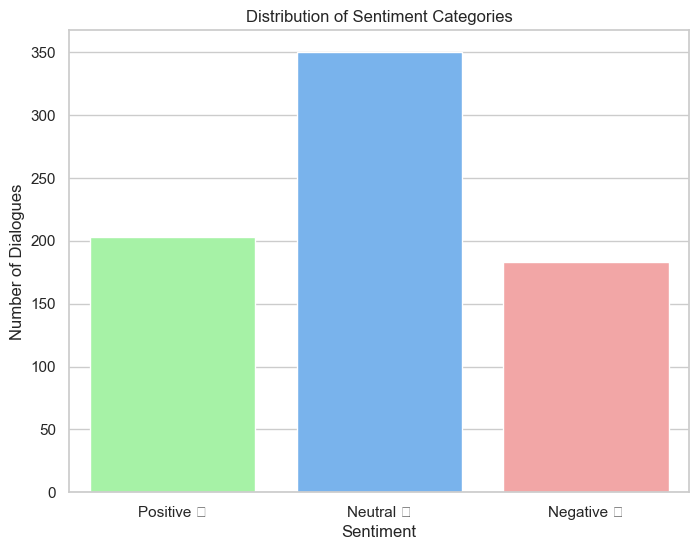

In [25]:
import warnings
warnings.filterwarnings('ignore')


sns.set(style="whitegrid")

# Summary statistics of the Compound Sentiment Scores
print("\nSummary Statistics of Compound Sentiment Scores:")
print(sentiment_dialogues_df['Compound Score'].describe())
x_sentiments = ['Positive 😊', 'Neutral 😐', 'Negative 😡']
x_colors = ['#99ff99', '#66b3ff', '#ff9999']


# Simple bar chart showing the count of each sentiment category
plt.figure(figsize=(8,6))
sns.countplot(x='Sentiment', data=sentiment_dialogues_df, order=x_sentiments, palette=x_colors)
plt.title('Distribution of Sentiment Categories')
plt.xlabel('Sentiment')
plt.ylabel('Number of Dialogues')

filename = 'average_sentiment_distribution.png'
filepath = os.path.join(output_viz_path,filename)
plt.savefig(filepath,dpi=300,bbox_inches='tight')

plt.show()
plt.close()


Average Sentiment by Character Role:
          Role  Compound Score
0   Antagonist        0.055332
1  Protagonist        0.023724
2   Supporting        0.015686


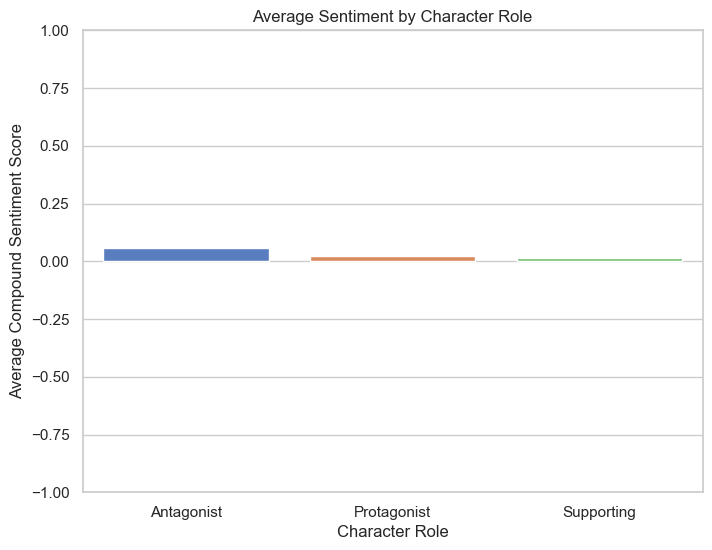

In [26]:
# Calculate average sentiment for each role
role_sentiment = sentiment_dialogues_df.groupby('Role')['Compound Score'].mean().reset_index()

# Display the average sentiment by role
print("\nAverage Sentiment by Character Role:")
print(role_sentiment)

# Bar chart to compare average sentiment across roles
plt.figure(figsize=(8,6))
sns.barplot(x='Role', y='Compound Score', data=role_sentiment, palette='muted')
plt.title('Average Sentiment by Character Role')
plt.xlabel('Character Role')
plt.ylabel('Average Compound Sentiment Score')
plt.ylim(-1, 1)  # VADER scores range from -1 to 1

filename = 'average_sentiment_by_char_role.png'
filepath = os.path.join(output_viz_path,filename)
plt.savefig(filepath,dpi=300,bbox_inches='tight')

plt.show()
plt.close()


Average Sentiment by Marginalized Status:
   Marginalized  Compound Score
0         False        0.022326
1          True        0.024569


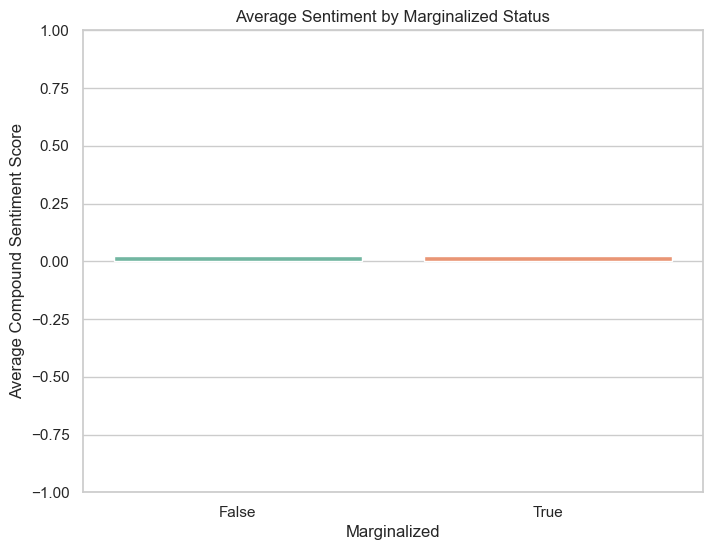

In [27]:
# Calculate average sentiment based on Marginalized status
marginalized_sentiment = sentiment_dialogues_df.groupby('Marginalized')['Compound Score'].mean().reset_index()

# Display the results
print("\nAverage Sentiment by Marginalized Status:")
print(marginalized_sentiment)

# Bar chart to compare average sentiment
plt.figure(figsize=(8,6))
sns.barplot(x='Marginalized', y='Compound Score', data=marginalized_sentiment, palette='Set2')
plt.title('Average Sentiment by Marginalized Status')
plt.xlabel('Marginalized')
plt.ylabel('Average Compound Sentiment Score')
plt.ylim(-1, 1)
filename = 'average_sentiment_by_marginalized_status.png'
filepath = os.path.join(output_viz_path,filename)
plt.savefig(filepath,dpi=300,bbox_inches='tight')

plt.show()
plt.close()


Average Sentiment by POC Status:
    POC  Compound Score
0  True        0.022896


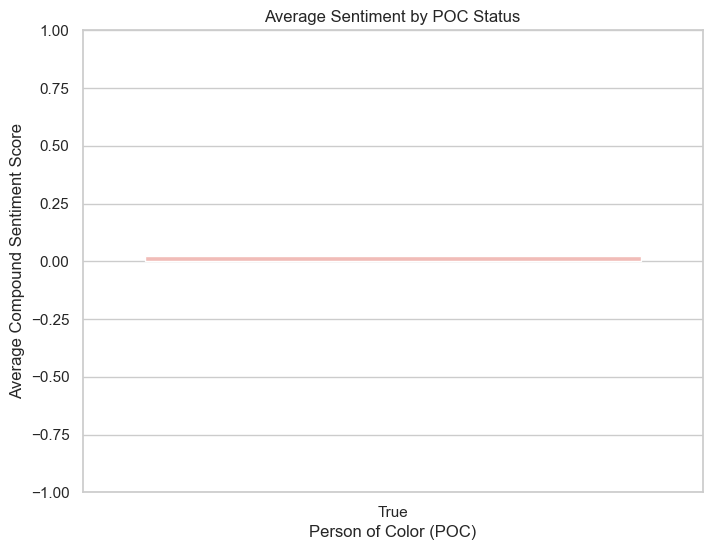

In [28]:
# Calculate average sentiment based on POC status
poc_sentiment = sentiment_dialogues_df.groupby('POC')['Compound Score'].mean().reset_index()

# Display the results
print("\nAverage Sentiment by POC Status:")
print(poc_sentiment)

# Bar chart to compare average sentiment
plt.figure(figsize=(8,6))
sns.barplot(x='POC', y='Compound Score', data=poc_sentiment, palette='Pastel1')
plt.title('Average Sentiment by POC Status')
plt.xlabel('Person of Color (POC)')
plt.ylabel('Average Compound Sentiment Score')
plt.ylim(-1, 1)
filename = 'average_sentiment_by_POC.png'
filepath = os.path.join(output_viz_path,filename)
plt.savefig(filepath,dpi=300,bbox_inches='tight')

plt.show()
plt.close()

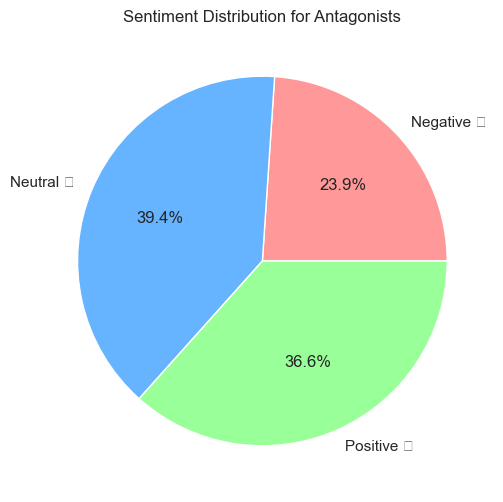

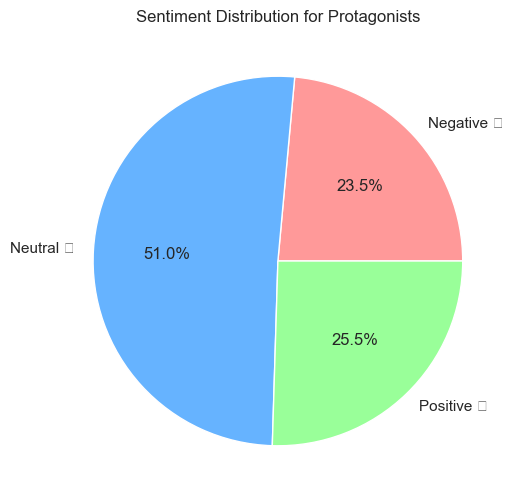

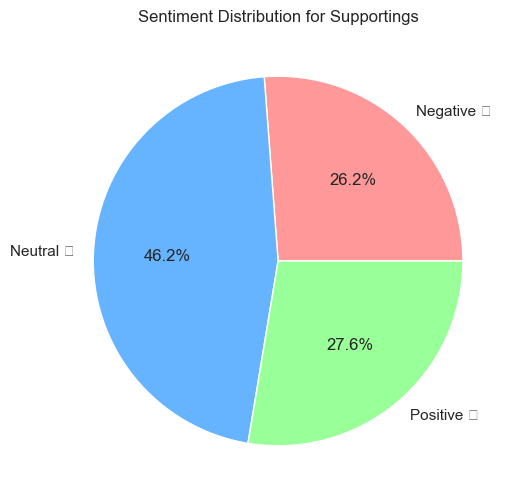

In [29]:
# Calculate sentiment distribution by role
role_sentiment_counts = sentiment_dialogues_df.groupby(['Role', 'Sentiment']).size().reset_index(name='Counts')

# Function to plot pie chart for a given role
def plot_pie(role):
    role_data = role_sentiment_counts[role_sentiment_counts['Role'] == role]
    plt.figure(figsize=(6,6))
    plt.pie(role_data['Counts'], labels=role_data['Sentiment'], autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99'])
    plt.title(f'Sentiment Distribution for {role}s')
    filename = f'sentiment_distribution_for_{role.lower()}.png'
    filepath = os.path.join(output_viz_path,filename)
    plt.savefig(filepath,dpi=300,bbox_inches='tight')
    plt.show()
    plt.close()
# Plot pie charts for each role
plot_pie('Antagonist')
plot_pie('Protagonist')
plot_pie('Supporting')

In [30]:
# Create a crosstab to count sentiments by Role and Marginalized status
pivot_marginalized = pd.crosstab(
    index=[sentiment_dialogues_df['Role'], sentiment_dialogues_df['Marginalized']],
    columns=sentiment_dialogues_df['Sentiment']
).fillna(0)

# Display the pivot table
print("\nCrosstab of Sentiments by Role and Marginalized Status:")
pivot_marginalized


Crosstab of Sentiments by Role and Marginalized Status:


Sentiment                 Negative 😡  Neutral 😐  Positive 😊
Role        Marginalized                                   
Antagonist  False                 17         28          26
Protagonist False                 73        158          79
Supporting  False                 45         84          39
            True                  48         80          59

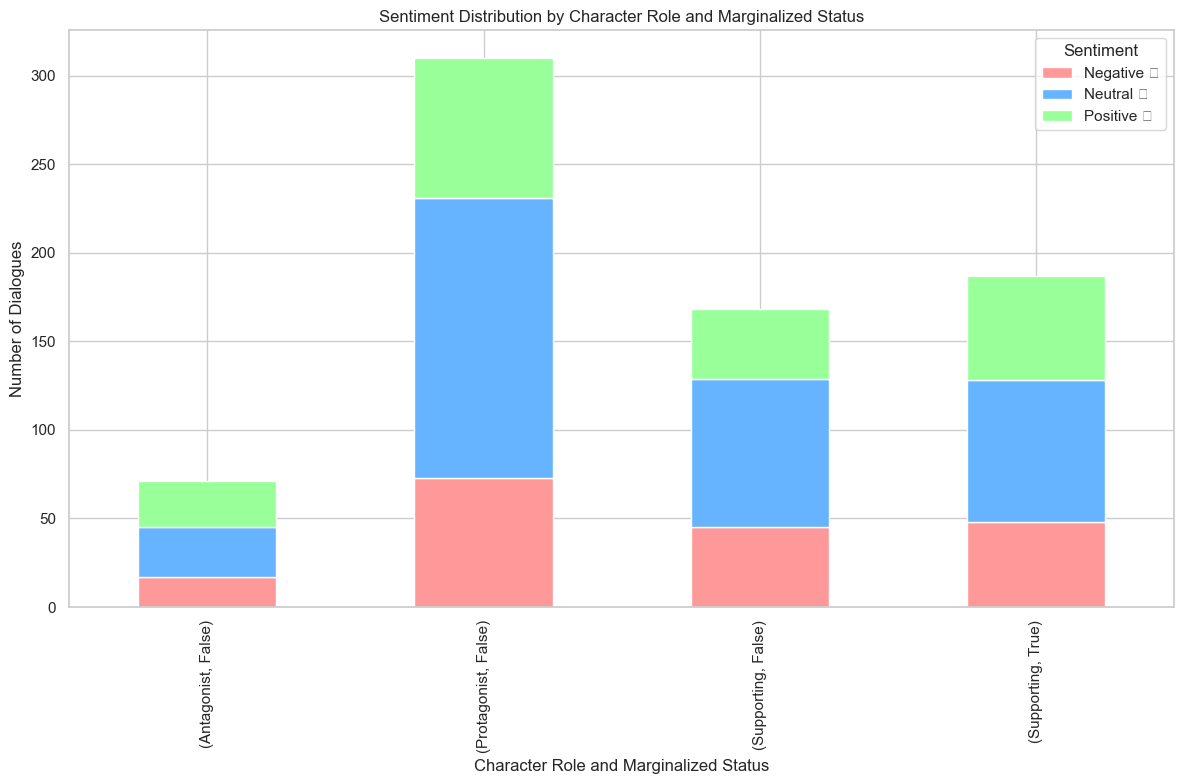

In [31]:
# Reset index to turn MultiIndex into columns
pivot_marginalized_reset = pivot_marginalized.reset_index()

# Rename columns for clarity
pivot_marginalized_reset.columns.name = None
pivot_marginalized_reset = pivot_marginalized_reset.rename(columns={
    'Role': 'Character Role',
    'Marginalized': 'Marginalized Status'
})

# Plotting
pivot_marginalized_reset.set_index(['Character Role', 'Marginalized Status']).plot(
    kind='bar',
    stacked=True,
    figsize=(12, 8),
    color=['#ff9999','#66b3ff','#99ff99']
)

plt.title('Sentiment Distribution by Character Role and Marginalized Status')
plt.xlabel('Character Role and Marginalized Status')
plt.ylabel('Number of Dialogues')
plt.legend(title='Sentiment')
plt.tight_layout()
filename = 'sentiment_distribution_charrole_and_marg_status.png'
filepath = os.path.join(output_viz_path,filename)
plt.savefig(filepath,dpi=300,bbox_inches='tight')
plt.show()


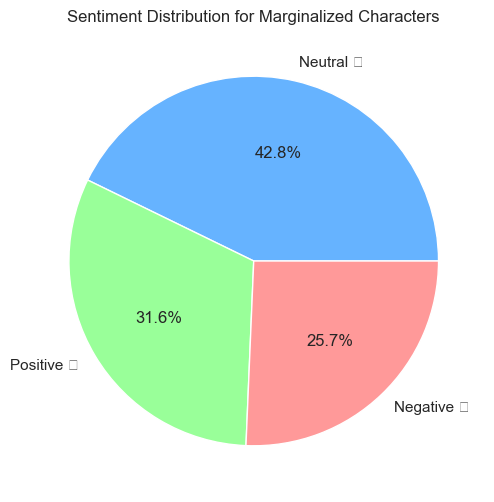

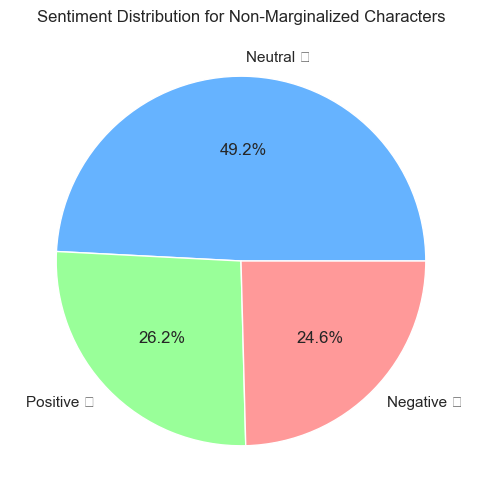

In [32]:
# Define a function to plot pie charts
def plot_pie(data, title, filename,output_path):
    sentiment_counts = data['Sentiment'].value_counts()
    plt.figure(figsize=(6,6))
    plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=['#66b3ff','#99ff99','#ff9999'])
    plt.title(title)

    filepath= os.path.join(output_path,filename)
    plt.savefig(filepath,dpi=300,bbox_inches='tight')
    plt.show()
    

# Plot pie chart for Marginalized Characters
marginalized_data = sentiment_dialogues_df[sentiment_dialogues_df['Marginalized'] == True]
plot_pie(marginalized_data, 'Sentiment Distribution for Marginalized Characters','sentiment_distribution_marg_chars.png',output_viz_path)

# Plot pie chart for Non-Marginalized Characters
non_marginalized_data = sentiment_dialogues_df[sentiment_dialogues_df['Marginalized'] == False]
plot_pie(non_marginalized_data, 'Sentiment Distribution for Non-Marginalized Characters','sentiment_distribution_non_marg_chars.png',output_viz_path)

In [33]:
gender_counts = sentiment_dialogues_df['Gender'].value_counts().reset_index()
gender_counts.columns = ["Gender","Dialogue Count"]
gender_counts.head()

,Gender,Dialogue Count
0,Male,596
1,Female,140


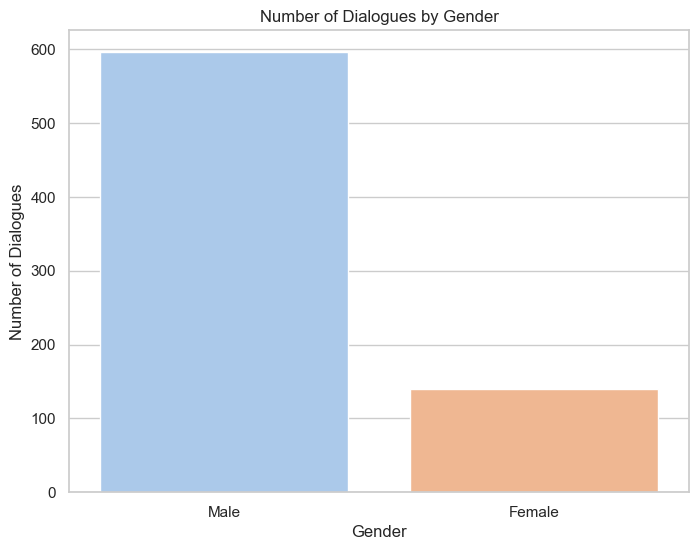

In [34]:
# Plotting Dialogue Counts by Gender
plt.figure(figsize=(8,6))
sns.barplot(x='Gender', y='Dialogue Count', data=gender_counts, palette='pastel')
plt.title('Number of Dialogues by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Dialogues')
filename='dialogue_distribution_by_gender.png'
filepath=os.path.join(output_viz_path,filename)
plt.savefig(filepath,dpi=300,bbox_inches='tight')
plt.show()
plt.close()

In [35]:
# Calculate sentiment distribution by gender
gender_sentiment_counts = sentiment_dialogues_df.groupby(['Gender', 'Sentiment']).size().reset_index(name='Counts')

gender_sentiment_counts

,Gender,Sentiment,Counts
0,Female,Negative 😡,38
1,Female,Neutral 😐,66
2,Female,Positive 😊,36
3,Male,Negative 😡,145
4,Male,Neutral 😐,284
5,Male,Positive 😊,167


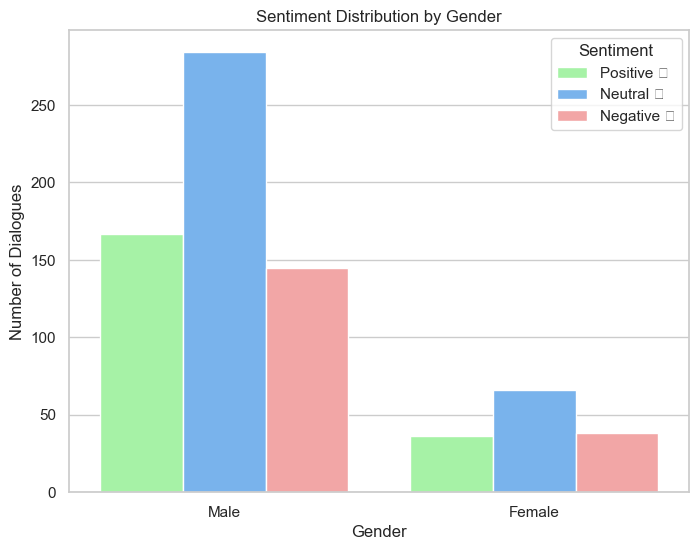

In [47]:
# Plotting Sentiment Distribution by Gender
plt.figure(figsize=(8,6))
sns.countplot(x='Gender', hue='Sentiment', data=sentiment_dialogues_df, palette=['#99ff99','#66b3ff','#ff9999'])
plt.title('Sentiment Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Dialogues')
plt.legend(title='Sentiment')
filename='sentiment_distribution_by_gender.png'
filepath=os.path.join(output_viz_path,filename)
plt.savefig(filepath,dpi=300,bbox_inches='tight')
plt.show()
plt.close()

In [37]:
# Calculate average sentiment score by gender
gender_avg_sentiment = sentiment_dialogues_df.groupby('Gender')['Compound Score'].mean().reset_index()

gender_avg_sentiment

,Gender,Compound Score
0,Female,0.018175
1,Male,0.024005


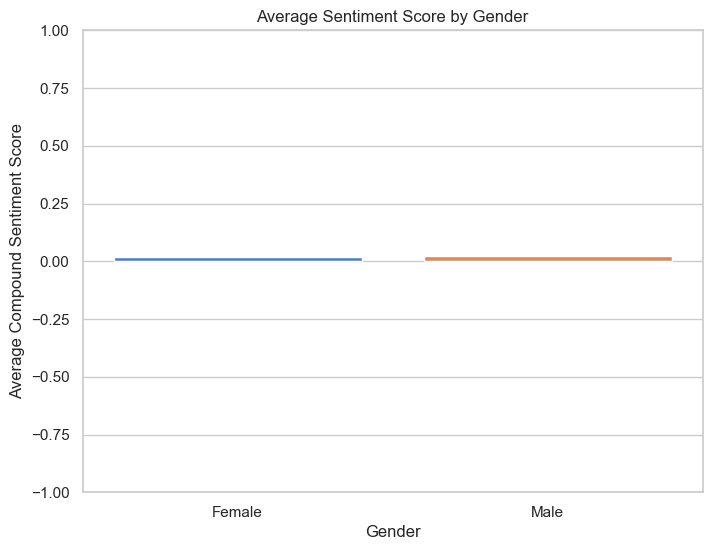

In [38]:
# Plotting Average Sentiment Score by Gender
plt.figure(figsize=(8,6))
sns.barplot(x='Gender', y='Compound Score', data=gender_avg_sentiment, palette='muted')
plt.title('Average Sentiment Score by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Compound Sentiment Score')
plt.ylim(-1, 1)  # VADER scores range from -1 to 1

filename='average_sentiment_score_by_gender.png'
filepath=os.path.join(output_viz_path,filename)
plt.savefig(filepath,dpi=300,bbox_inches='tight')
plt.show()
plt.close()

In [39]:
# Create a new column with descriptive labels for POC status
sentiment_dialogues_df['POC_Status'] = sentiment_dialogues_df['POC'].map({True: 'POC', False: 'Non-POC'})

# Verify the mapping
sentiment_dialogues_df[['Gender', 'POC', 'POC_Status']].sample(6)

,Gender,POC,POC_Status
377,Male,True,POC
683,Male,True,POC
230,Male,True,POC
126,Male,True,POC
597,Male,True,POC
587,Male,True,POC


In [40]:
# Recalculate sentiment distribution using POC_Status
gender_poc_sentiment = sentiment_dialogues_df.groupby(['Gender', 'POC_Status', 'Sentiment']).size().reset_index(name='Counts')

# Display the updated grouped data
gender_poc_sentiment

,Gender,POC_Status,Sentiment,Counts
0,Female,POC,Negative 😡,38
1,Female,POC,Neutral 😐,66
2,Female,POC,Positive 😊,36
3,Male,POC,Negative 😡,145
4,Male,POC,Neutral 😐,284
5,Male,POC,Positive 😊,167


In [41]:
# Pivot the data for stacked bar plot
pivot_gender_poc = gender_poc_sentiment.pivot_table(
    index=['Gender', 'POC_Status'],
    columns='Sentiment',
    values='Counts',
    fill_value=0
).reset_index()

pivot_gender_poc

Sentiment,Gender,POC_Status,Negative 😡,Neutral 😐,Positive 😊
0,Female,POC,38.0,66.0,36.0
1,Male,POC,145.0,284.0,167.0


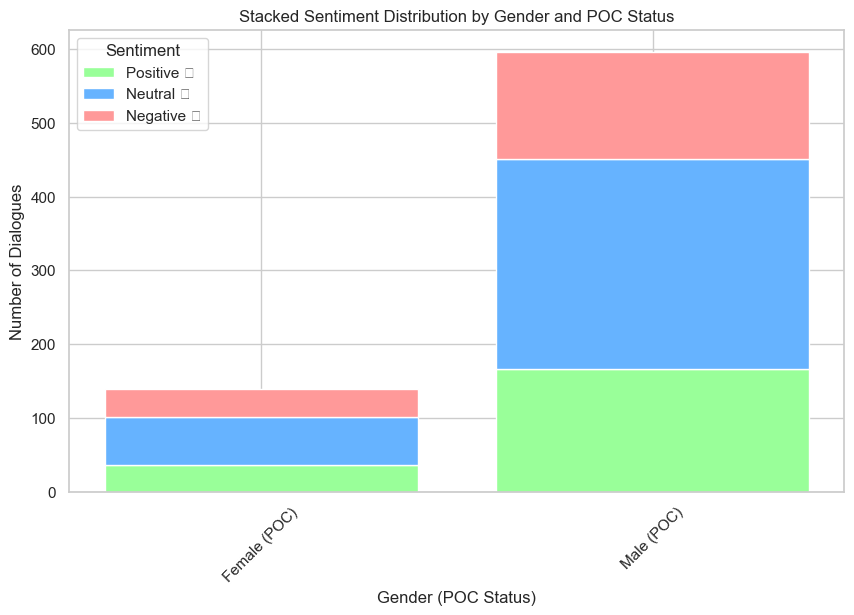

In [42]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Initialize the bottom position for stacking
bottom = None

# Define the sentiments and corresponding colors
sentiments = ['Positive 😊', 'Neutral 😐', 'Negative 😡']
colors = ['#99ff99', '#66b3ff', '#ff9999']

# Loop through sentiments to create stacked bars
for i, sentiment in enumerate(sentiments):
    if i == 0:
        plt.bar(
            pivot_gender_poc['Gender'] + ' (' + pivot_gender_poc['POC_Status'] + ')',
            pivot_gender_poc[sentiment],
            color=colors[i],
            label=sentiment
        )
        bottom = pivot_gender_poc[sentiment]
    else:
        plt.bar(
            pivot_gender_poc['Gender'] + ' (' + pivot_gender_poc['POC_Status'] + ')',
            pivot_gender_poc[sentiment],
            bottom=bottom,
            color=colors[i],
            label=sentiment
        )
        bottom += pivot_gender_poc[sentiment]

# Add title and labels
plt.title('Stacked Sentiment Distribution by Gender and POC Status')
plt.xlabel('Gender (POC Status)')
plt.ylabel('Number of Dialogues')
plt.legend(title='Sentiment')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Save the plot
#plt.savefig(os.path.join(output_folder, 'stacked_bar_charts', 'stacked_sentiment_distribution_by_gender_poc.png'), dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

# Close the plot to free memory
plt.close()

In [43]:
# Create a combined category for POC and Marginalized Status
sentiment_dialogues_df['POC_Marginalized'] = sentiment_dialogues_df.apply(
    lambda row: 'POC & Marginalized' if row['POC_Status'] == 'POC' and row['Marginalized'] else
                'POC & Non-Marginalized' if row['POC_Status'] == 'POC' and not row['Marginalized'] else
                'Non-POC & Marginalized' if row['POC_Status'] == 'Non-POC' and row['Marginalized'] else
                'Non-POC & Non-Marginalized',
    axis=1
)

# Display the updated DataFrame
sentiment_dialogues_df[['Gender', 'POC_Marginalized', 'Sentiment']].head()

,Gender,POC_Marginalized,Sentiment
0,Male,POC & Non-Marginalized,Positive 😊
1,Male,POC & Non-Marginalized,Neutral 😐
2,Male,POC & Non-Marginalized,Positive 😊
3,Male,POC & Non-Marginalized,Neutral 😐
4,Male,POC & Non-Marginalized,Negative 😡


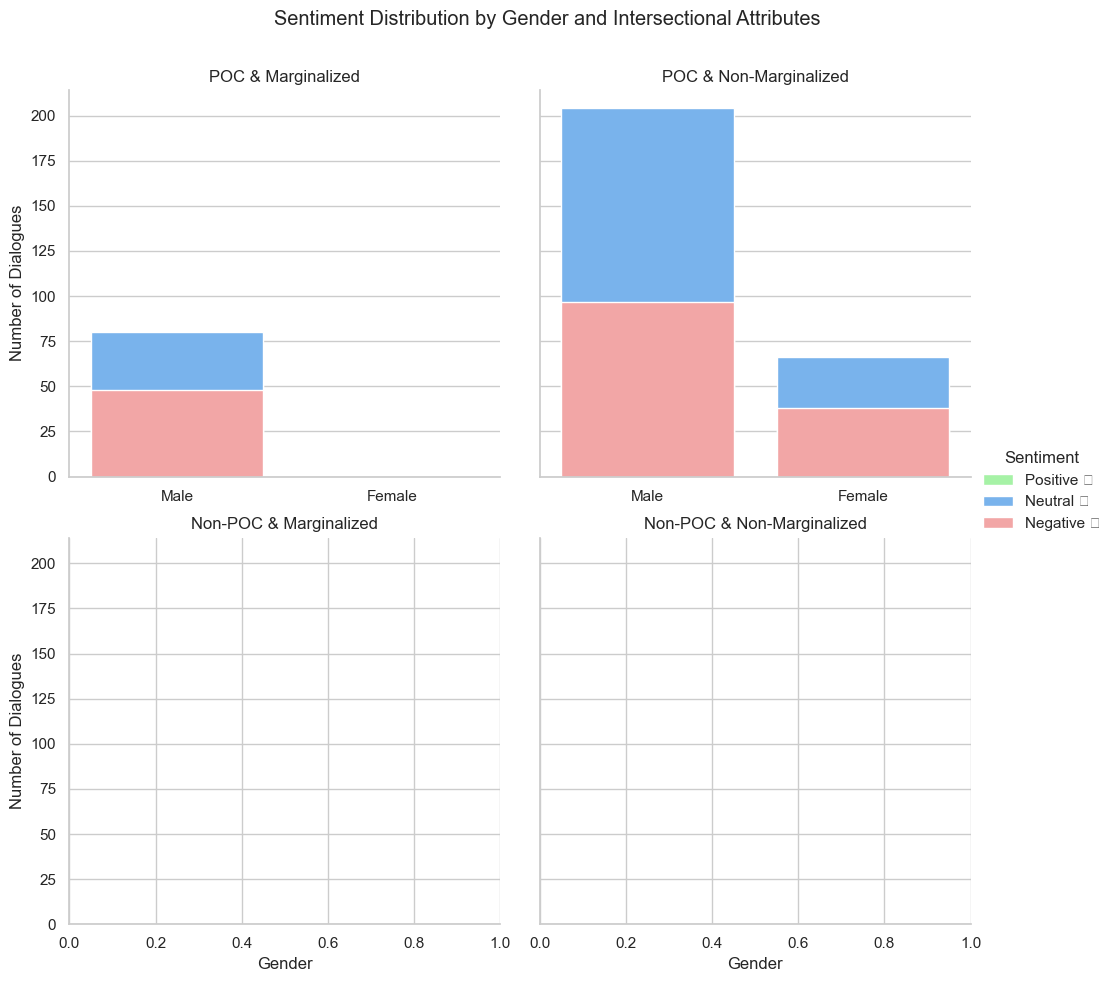

In [48]:
# Define all possible categories for POC_Marginalized
categories = [
    'POC & Marginalized',
    'POC & Non-Marginalized',
    'Non-POC & Marginalized',
    'Non-POC & Non-Marginalized'
]

# Update the 'POC_Marginalized' column with categorical type
sentiment_dialogues_df['POC_Marginalized'] = pd.Categorical(
    sentiment_dialogues_df['POC_Marginalized'],
    categories=categories
)

# Recreate the FacetGrid with the defined categories
g = sns.FacetGrid(
    sentiment_dialogues_df,
    col='POC_Marginalized',
    hue='Sentiment',
    col_wrap=2,
    height=5,
    palette=['#99ff99','#66b3ff','#ff9999'],
    sharex=False
)

g.map(sns.countplot, 'Gender', order=['Male', 'Female'])

# Add legend and titles
g.add_legend(title='Sentiment')
g.set_axis_labels('Gender', 'Number of Dialogues')
g.set_titles("{col_name}")

# Adjust the layout and add a main title
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Sentiment Distribution by Gender and Intersectional Attributes')

# Save the FacetGrid plot
#g.savefig(os.path.join(output_folder, 'bar_charts', 'sentiment_distribution_facetgrid_complete.png'), dpi=300, bbox_inches='tight')
filename = 'sentiment_distribution_facetgrid_complete.png'
filepath = os.path.join(output_viz_path,filename)
plt.savefig(filepath, dpi=300,bbox_inches='tight')

# Display the plot
plt.show()

# Close the plot to free memory
plt.close()

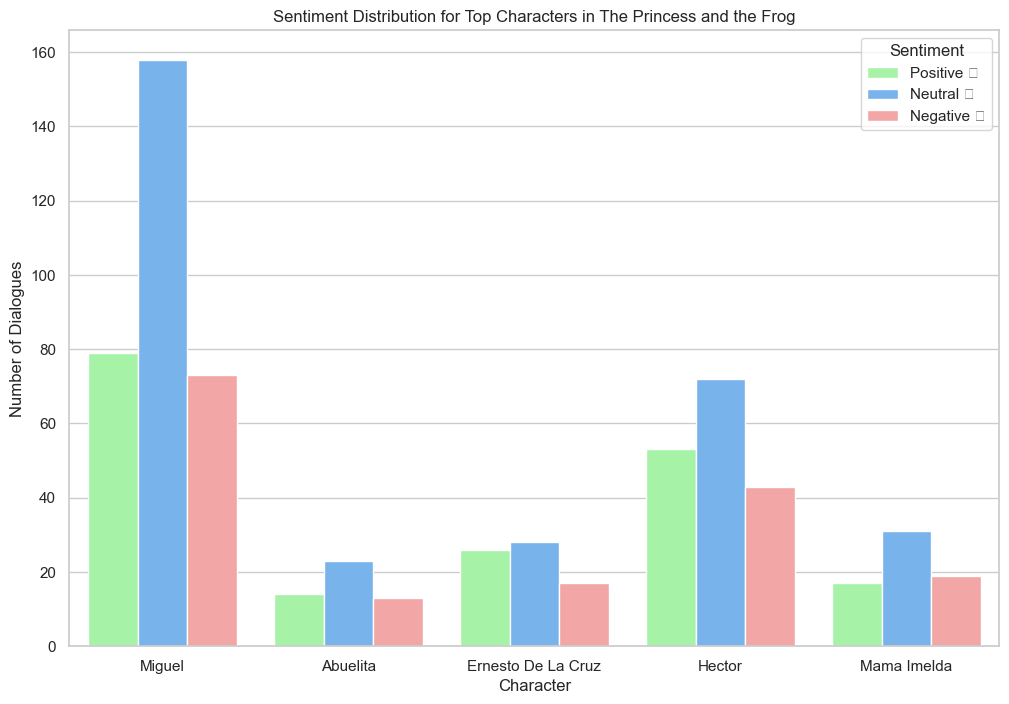

In [49]:
# Identify top 5 characters by dialogue count
top_characters = sentiment_dialogues_df['Character'].value_counts().head(5).index.tolist()

# Filter data for top characters
top_characters_data = sentiment_dialogues_df[sentiment_dialogues_df['Character'].isin(top_characters)]

# Plot sentiment distribution for top characters
plt.figure(figsize=(12, 8))
sns.countplot(x='Character', hue='Sentiment', data=top_characters_data, palette=['#99ff99','#66b3ff','#ff9999'])
plt.title('Sentiment Distribution for Top Characters in The Princess and the Frog')
plt.xlabel('Character')
plt.ylabel('Number of Dialogues')
plt.legend(title='Sentiment')
filename = 'sentiment_distribution_top_characters.png'
filepath = os.path.join(output_viz_path,filename)
plt.savefig(filepath, dpi=300,bbox_inches='tight')
plt.show()
plt.close()